In [1]:
'''
Author: daniel
Date: 2023-02-20 20:23:29
LastEditTime: 2023-02-20 20:27:07
LastEditors: daniel
Description: 
FilePath: /Cerberus-main/jupyters/nyud3.ipynb
have a nice day
'''

# !pip install ipykernel

import os 
os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
# from dataloaders.datasets.nyud_geonet import NYUD_GeoNet

from dataloaders.datasets.nyud3 import Nyud3
# from dataloaders.datasets.nyud_geonet import *
import matplotlib.pyplot as plt


import numpy as np 
import cv2
import torchvision.transforms as transforms
from utils import  * 
from PIL import Image
import math
import torch.nn.functional as F

from os.path import split,join,exists

#* initial
# plt.rcParams['figure.figsize'] = (8.0, 2.0) # 设置figure_size尺寸
# plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
# plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400



Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

## 1. check origin edge generated by canny 

processing with multiple threads: || 99.8% doneeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedge generation done 


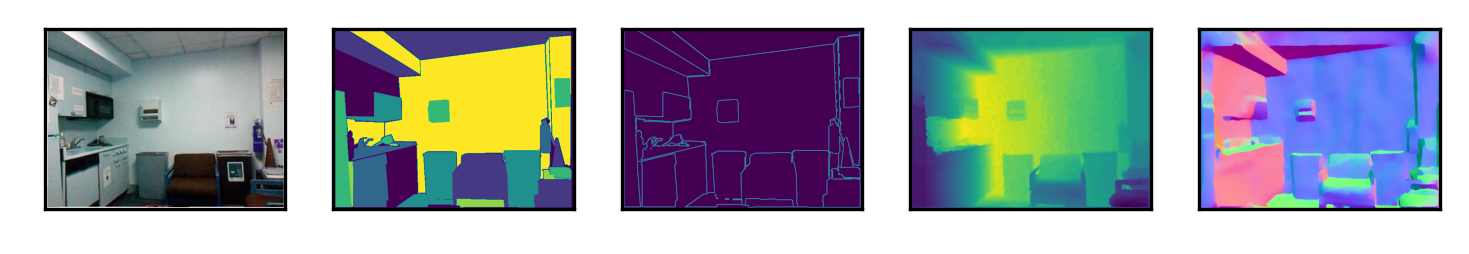

In [2]:
dataset = Nyud3()

image,label,edge,depth_map,normal_map,name= dataset.getitem(0)

show_imgs([image,label,edge,depth_map,normal_map],[0,0,0,0,0,0,0])


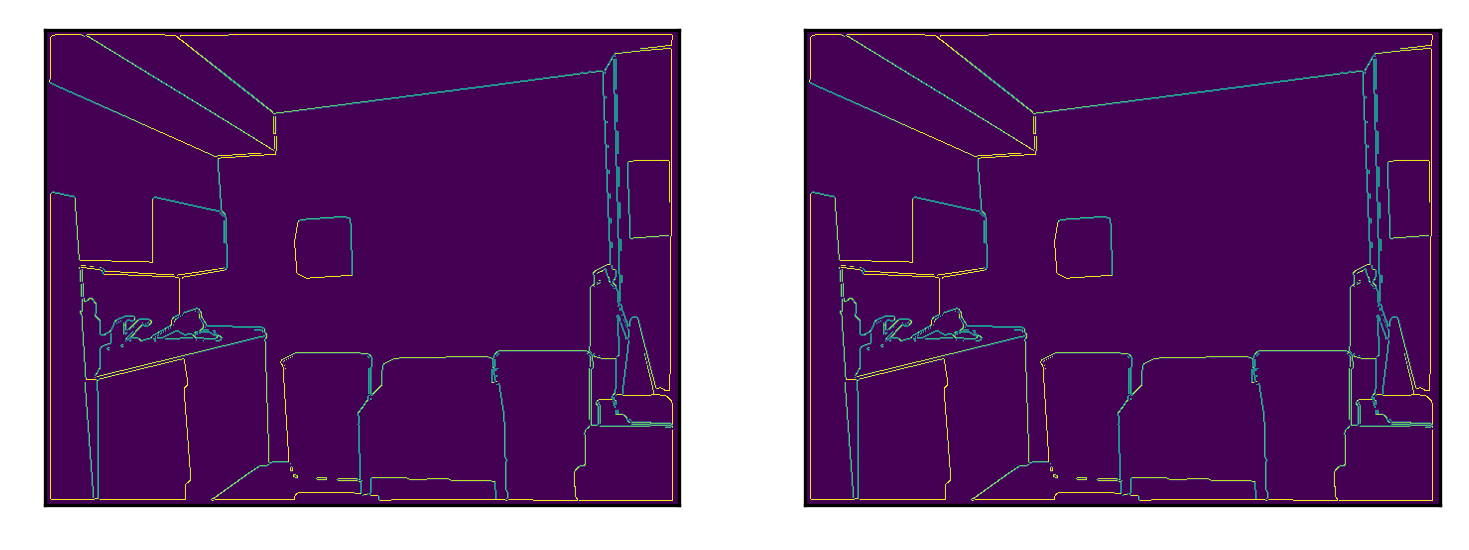

In [3]:
label_tmp =label.copy()

label_tmp=normalize(label_tmp)*255
label_tmp=to_3_channel(label_tmp).astype(np.uint8)
# label_tmp=check_img(label_tmp)
show_imgs([detect_edge(label_tmp,150,240)*255,edge],[0,0])

## 2. check NYUD2 s

In [4]:
from utils import *
mat_path = '/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/nyud2/val/edge_gt/img_5001.mat'
data  = load_mat(mat_path)

# show_imgs([data['groundTruth'][0,0]['Boundaries'][0,0]],[0])
# show_imgs([data['groundTruth'][0,0]['Segmentation'][0,0]],[0])
# show_imgs([data['groundTruth'][0,0]['SegmentationClass'][0,0]],[0])


## 3. check the new edge 

processing with multiple threads: || 99.8% doneeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedge generation done 


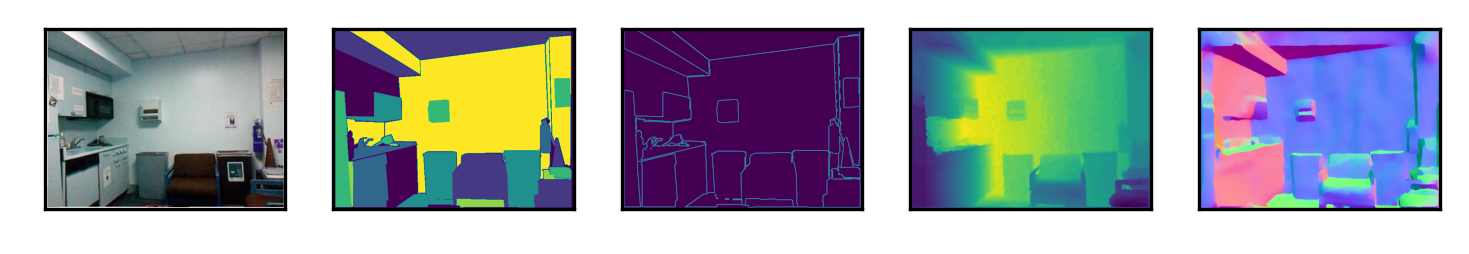

In [5]:
dataset = Nyud3()

image,label,edge,depth_map,normal_map,name= dataset.getitem(0)

show_imgs([image,label,edge,depth_map,normal_map],[0,0,0,0,0,0,0])


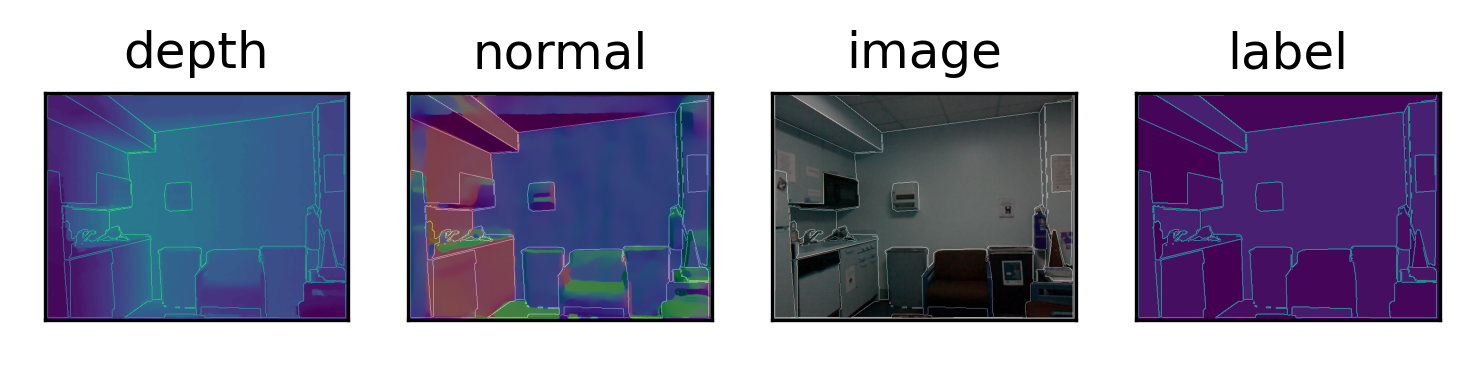

In [6]:
show_imgs(
        [merge_images(edge,0.2,depth_map,0.8),
        merge_images(edge,0.5,normal_map,0.5),
        merge_images(edge,0.5,image,0.5),
        merge_images(edge,0.2,label,0.8),
        ],
        [0,0,0,0,0,0,],['depth','normal','image','label'])

# generate the depth edge

In [24]:
dataset = Nyud3()


processing with multiple threads: || 99.8% doneeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedge generation done 


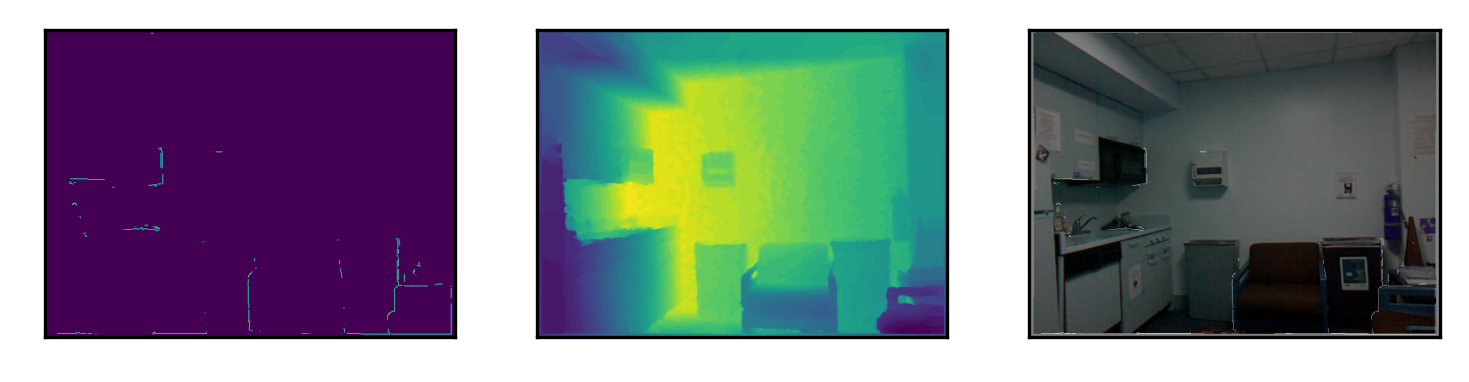

In [58]:
demo_idx  = 0
image,label,edge,depth_map,normal_map,name = dataset.getitem(demo_idx)
depth_edge = dataset.gen_depth_edge(demo_idx,2,2,4)
show_imgs([depth_edge,depth_map,merge_images(depth_edge,0.5,image,0.5)],[0,0,0,])

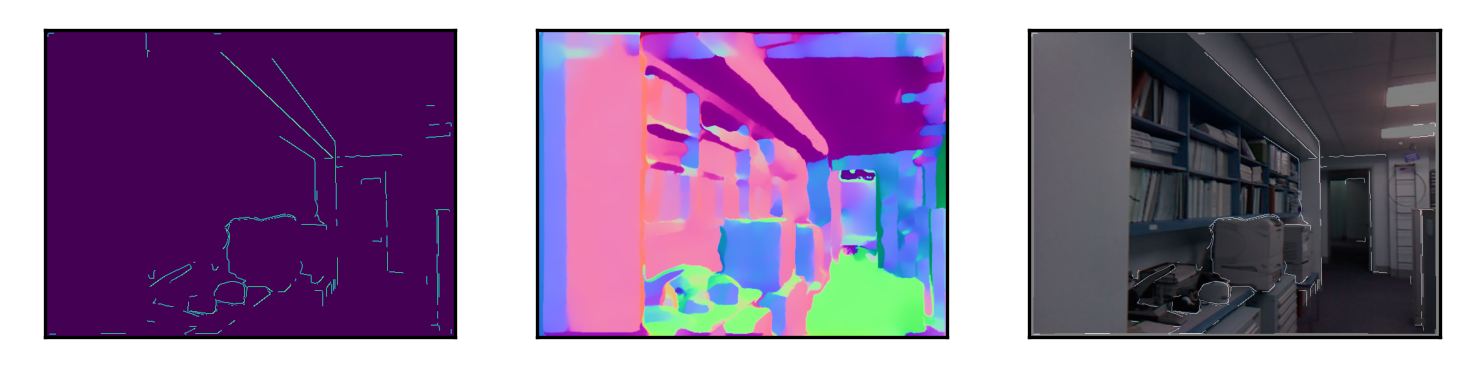

In [46]:
normal_edge = dataset.gen_normal_edge(demo_idx,4,4,0.08)
show_imgs([normal_edge,normal_map,merge_images(normal_edge,0.5,image,0.5)],[0,0,0,])